In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')
%cd '/content/drive/My Drive'

Mounted at /content/drive
/content/drive/My Drive


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv("COVID-19_Daily_Testing.csv")
data.head()

,Date,Day,Tests,Cases,People Not-Positive - Total,People Tested - Age 0-17,People Tested - Age 18-29,People Tested - Age 30-39,People Tested - Age 40-49,People Tested - Age 50-59,People Tested - Age 60-69,People Tested - Age 70-79,People Tested - Age 80+,People Tested - Age Unknown,People Tested - Female,People Tested - Male,People Tested - Gender Unknown,People Tested - Latinx,People Tested - Asian Non-Latinx,People Tested - Black Non-Latinx,People Tested - White Non-Latinx,People Tested - Other Race Non-Latinx,People Tested - Unknown Race/Ethnicity,People Positive - Age 0-17,People Positive - Age 18-29,People Positive - Age 30-30,People Positive - Age 40-49,People Positive - Age 50-59,People Positive - Age 60-69,People Positive - Age 70-79,People Positive - Age 80+,People Positive - Age Unknown,People Positive - Female,People Positive - Male,People Positive - Gender Unknown,People Positive - Latinx,People Positive - Asian Non-Latinx,People Positive - Black Non-Latinx,People Positive - White Non-Latinx,People Positive - Other Race Non-Latinx,People Positive - Unknown Race/Ethnicity,People Not-Positive - Age 0-17,People Not-Positive - Age 18-29,People Not-Positive - Age 30-39,People Not-Positive - Age 40-49,People Not-Positive - Age 50-59,People Not-Positive - Age 60-69,People Not-Positive - Age 70-79,People Not-Positive - Age 80+,People Not-Positive - Age Unknown,People Not-Positive - Female,People Not-Positive - Male,People Not-Positive - Gender Unknown,People Not-Positive - Latinx,People Not-Positive - Asian Non-Latinx,People Not-Positive - Black Non-Latinx,People Not-Positive - White Non-Latinx,People Not-Positive - Other Race Non-Latinx,People Not-Positive - Unknown Race/Ethnicity
0,03-01-20,Sunday,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,05-02-20,Saturday,"2,431",705,"1,726",129,470,458,458,412,281,128,94,1,"1,238","1,158",35,569,39,376,276,73,"1,098",24,141,120,152,137,76,39,16,0,340,361,4,343,9,103,51,22,177,105,329,338,306,275,205,89,78,1,898,797,31,226,30,273,225,51,921
2,05/14/2020,Thursday,"4,098",772,"3,326",260,805,833,685,604,471,253,171,16,"2,049","1,786",263,848,55,581,510,144,"1,960",48,167,153,131,107,95,42,29,0,395,362,15,319,12,151,68,35,187,212,638,680,554,497,376,211,142,16,"1,654","1,424",248,529,43,430,442,109,"1,773"
3,03-05-20,Thursday,17,1,16,4,2,0,4,3,2,0,2,0,8,9,0,2,0,5,2,1,7,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,4,2,0,4,2,2,0,2,0,7,9,0,2,0,4,2,1,7
4,03-06-20,Friday,18,3,15,1,5,1,3,3,2,2,0,1,8,10,0,2,0,1,5,1,9,0,0,0,2,0,1,0,0,0,0,3,0,0,0,0,3,0,0,1,5,1,1,3,1,2,0,1,8,7,0,2,0,1,2,1,9


In [5]:
data['Cases'] = data['Cases'].str.replace(',', '')
data['Tests'] = data['Tests'].str.replace(',', '')

In [6]:
data['Cases'] = pd.to_numeric(data['Cases'])
data['Tests'] = pd.to_numeric(data['Tests'])

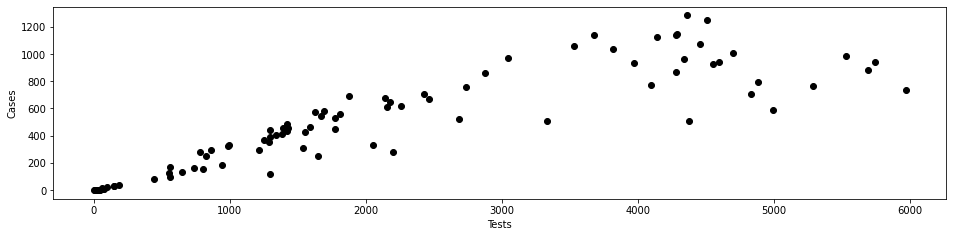

In [7]:
plt.figure(figsize=(16, 8))
plt.scatter(
    data['Tests'],
    data['Cases'],    
    c='black'
)
plt.axis('scaled')
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

In [8]:
X = data['Tests'].values.reshape(-1,1)
y = data['Cases'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)
reg = LinearRegression()
reg.fit(X, y)
print("The linear model is: Y = {:.5} + {:.5}X".format(reg.intercept_[0], reg.coef_[0][0]))
predictions = reg.predict(X)

The linear model is: Y = 97.777 + 0.18572X


In [9]:
actvspred = pd.DataFrame({'Actual': y.flatten(), 'Predicted': predictions.flatten()})

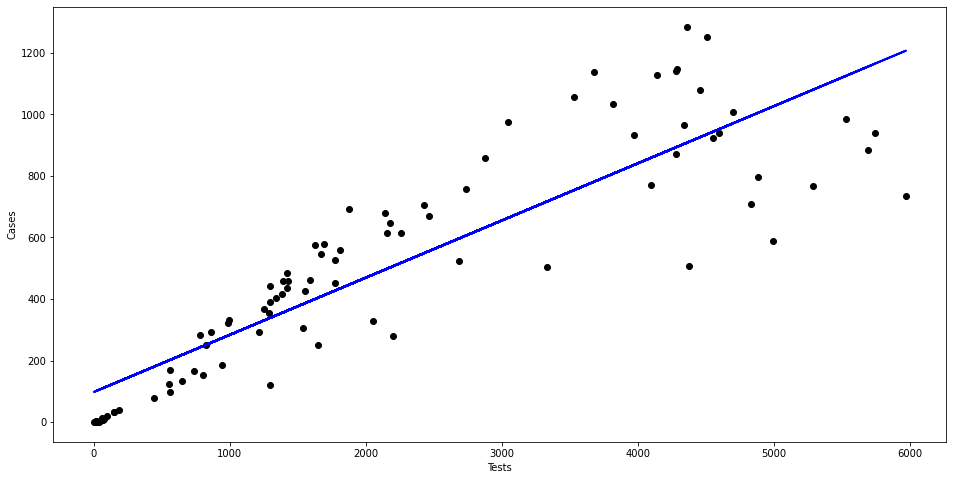

In [10]:
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    X,
    predictions,
    c='blue',
    linewidth=2
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()

In [11]:
print('RMSE for Linear Regression=>',np.sqrt(mean_squared_error(y,predictions)))

RMSE for Linear Regression=> 171.79768160540917


In [12]:
poly = PolynomialFeatures(degree =4) 
X_poly = poly.fit_transform(X) 

In [13]:
poly.fit(X_poly, y) 
lin2 = LinearRegression() 
lin2.fit(X_poly, y) 
pred = lin2.predict(X_poly)
new_X, new_y = zip(*sorted(zip(X, pred)))

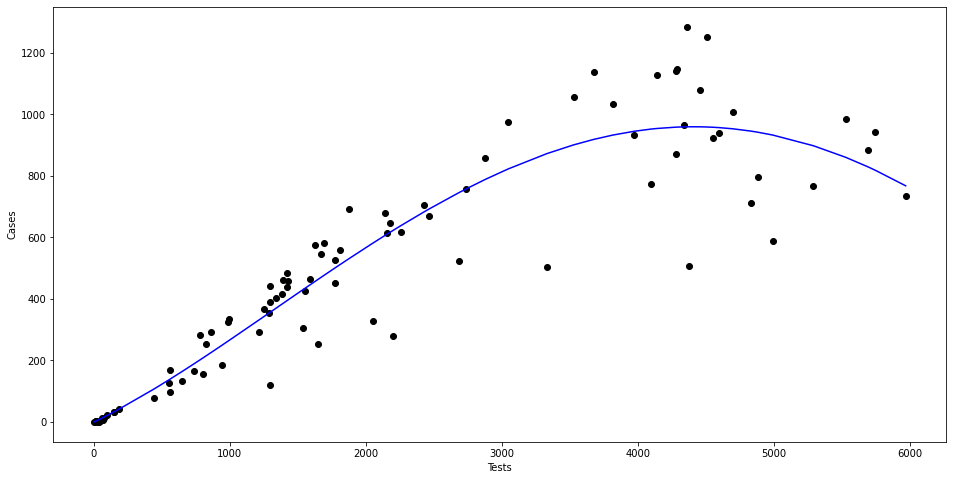

In [15]:
plt.figure(figsize=(16, 8))
plt.scatter(
    X,
    y,
    c='black'
)
plt.plot(
    new_X, new_y,
    c='blue'
)
plt.xlabel("Tests")
plt.ylabel("Cases")
plt.show()


In [16]:
print('RMSE for Polynomial Regression=>',np.sqrt(mean_squared_error(y,lin2.predict(poly.fit_transform(X)))))

RMSE for Polynomial Regression=> 131.076775703435
